In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('price_pred.csv')

# Preprocessing

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


$in$ $above$ $table$
count is different of features so missing values are present. Brand,Body,Mileage,Eng Type,Reg,Year has same count.

Unique of Model is 312 therefore we must create 312 dummy variables. So model is dropped. A lot of the information from model can be engineered from Brand,Year,EngineV so we wont lose too much variability.

In [6]:
data = raw_data.drop(['Model'],axis = 1)  #rows axis = 0,column axis = 1

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
total_obs = 4345  #obs or samples 'm'
num_of_null_obs = 172  #Null Price
percentage_of_nullobs = (172/4345)*100
percentage_of_nullobs

3.958573072497123

We are free to remove all obs that have missing values, if obs removed is less than 5% of the sample length ie total_obs.

Since 3.95% < 5%, so we can remove all obs that have null Price. Similarly null EngineV.

In [9]:
data_no_mv = data.dropna(axis = 0) #axis = 0 since obs is rows

In [10]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


$PRICE:$
mean is around \\$19k, minimum price is \\$600, 25% is less than \\$7k,

75% is less than \\$22k but max price is \\$300k. Big difference is observed. So there must be Outliers.

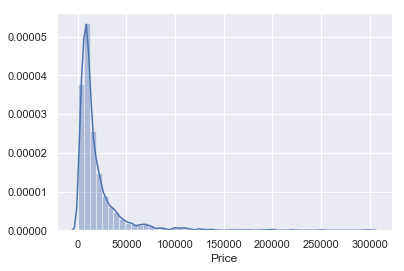

In [11]:
sns.distplot(data_no_mv['Price'])  #plotting their Probability Dist. Function Which we can see in min,max,25,50,75.

We see that $Price$ Doesnt have a $Normal Distribution$.
The Price is concentrated around 0-50k, therefore around 300k are outliers.
We get rid of Outliers by removing the top 1%...

In [12]:
q = data_no_mv['Price'].quantile(0.99)  #returns value at given Quantile(=np.percentile)
data_1 = data_no_mv[data_no_mv['Price']<q]

In [13]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


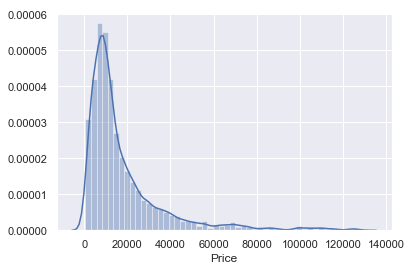

In [14]:
sns.distplot(data_1['Price'])

Still not Normal but less outliers.

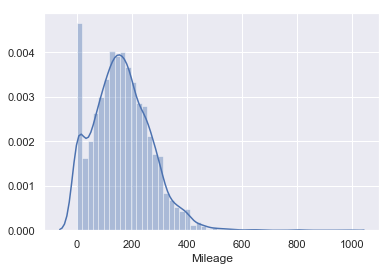

In [15]:
sns.distplot(data_no_mv['Mileage'])

In [16]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

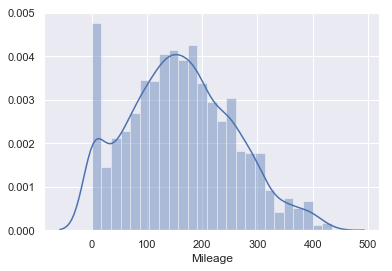

In [17]:
sns.distplot(data_2['Mileage'])

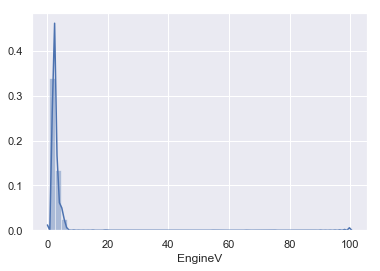

In [18]:
sns.distplot(data_no_mv['EngineV'])

Google EngineVolume and you will find normal interval where engine volume should fall is 0.6-6.5

In [19]:
 data_3 = data_2[data_2['EngineV']<6.5]

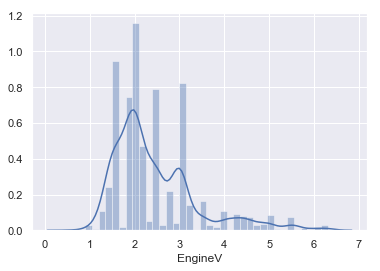

In [20]:
sns.distplot(data_3['EngineV'])

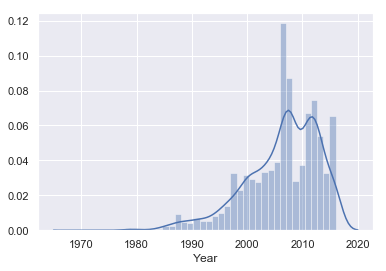

In [21]:
sns.distplot(data_no_mv['Year'])

In [22]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

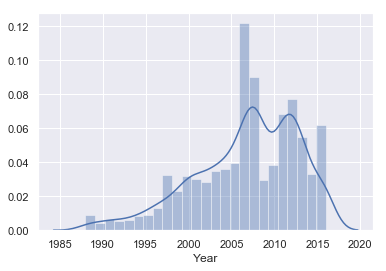

In [23]:
sns.distplot(data_4['Year'])

**Currently the indices refer to all the data(including the removed obs)**

In [24]:
data_cleaned = data_4.reset_index(drop=True)

In [25]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [26]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


**Overall we have removed about 250 problematic samples/obs and the min max are okay**

# After Preprocessing, Checking The OLS assumptions

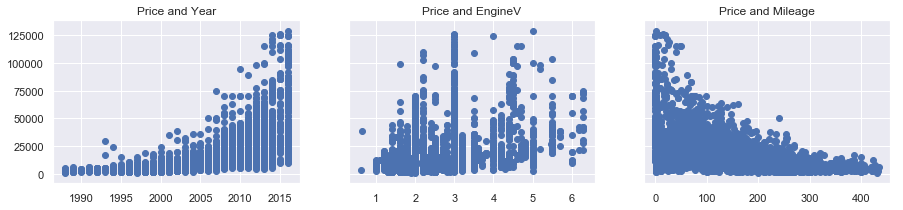

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

Figures so that they are not linear.

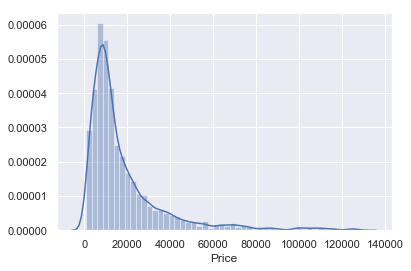

In [28]:
sns.distplot(data_cleaned['Price']) #SInce Price is not Normal so the Above Scatter Plots{Price vs Year, etc} are not linear.

Log transformation takes care of the problem mentioned in the above comment. LogT is esp. useful when scatter plots are exponential like the ones above.

In [29]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


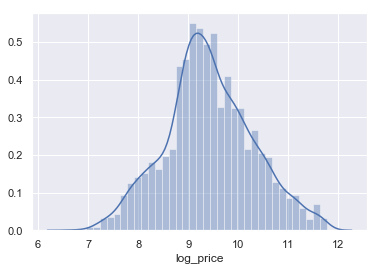

In [30]:
sns.distplot(data_cleaned['log_price'])

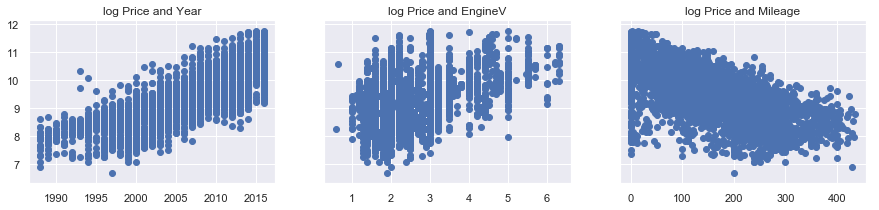

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log Price and Mileage')
plt.show()

Thus we can fit a linear line to the above scatter plots...Log transformation decreases X-axis or Y-axis length..see video.

In [32]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

# Checking Regression Assumptions

**NO Endogeneity (Sigma(X,e))** (given by author of dataset, but we can also check that after regression is created)

**NOrmality** (for a big sample is assumed following the central limit theorem) **zero mean** (we have achieved that with inclusion of bias/intercept term in the regression) **Homoscedasticity** (is already achieved as we can see in above subplots, the reason for that is we have used log transformation)

**No Autocorrelation (Sigma(ei,ej))** (Each row comes from different customers so no serial correlation between the customers)

**MULTICOLLINEARITY :**

In [33]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is logical that Year and Mileage will be correlated. More year,Less mileage. So there will be some degree of Multicollinearity. We use VIF from StatsModels.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  #SKLEARN doesnt have way to check MULTICOLLINEAR
variables = data_cleaned[['Mileage','Year','EngineV']] #MC check with continuous values(Mileage,Year,EngineV).others r categorical.
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [35]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


When VIF is 1: No Multicollinearity.

1<VIF<5: Perfectly okay

5,6,10 are cutoffs from various sources respectively and | VIF > 5/6/10 | is unacceptable

We will rarely find variables with MC less than 5 in real life.

But in this dataset, year is > 10, so we remove Year.

In [36]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

# Preprocess Categorical Data

**Creating DUMMY VARIABLES**

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity)

In [38]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


If we have N categories for a feature, we have to create N-1 dummies so drop_first = True(see below code)... **Not creating N-1 dummies like above will create Multicollinearity.**

In [39]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [40]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearranging the variables

In [41]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']  #Reordering logprice to first place

In [43]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

In [44]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
inputs_scaled = scaler.transform(inputs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


StandardScaler thus also standardises the dummy variables which is not recommended in subjects other than ML..Thus DummyVariables are no longer dummies of 1 and 0....but Scaling has no effect on the predictive power of dummies. Later we develop a custom Scaler which excludes dummies.

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state = 365)

In [49]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_hat = reg.predict(x_train)

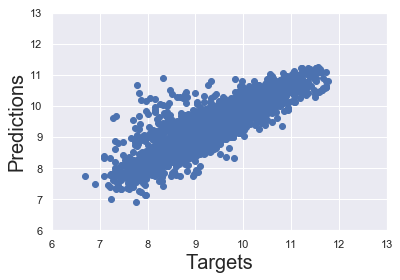

In [63]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets',size = 20)
plt.ylabel('Predictions',size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

the closer the plots of the above graph to a 45degree angled straight line, the more accurate the predictions....we can also check probability distribution of residuals for error in prediction..

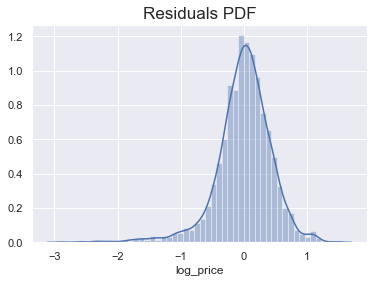

In [69]:
sns.distplot(y_train - y_hat)  #ytrain minus yhat
plt.title('Residuals PDF',size = 17)
plt.show()

Residuals are the estimates of the errors...the pdf of them must have zero mean, normal, homoscedasticity...

Looking at above plot we see that for certain samples, ytrain-yhat is much lower than the mean(a much higher price is predicted than what is observed) ..on the other hand, predicted price is rarely lower than observed. We can use this observation to better our model..

In [70]:
reg.score(x_train,y_train)

0.744996578792662

our model is explaining 75% of the variability of the data

In [71]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


these are not intepretable that well cz of scaled,log data, but we make do..positive weights show that as those features increase in value, so do the log_price and 'Price' vice versa..

### dropped dummy explained:

In [72]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

looking at the weights-table, we see audi was dropped...when all other dummys are zero, audi is one...so audi is the benchmark...if another brand dummy is positive, it means that all else equal, the respectibe brand is more expensive...positive weight shows that respective category(BRAND) is more expensive than the benchmark(Audi) and vice versa..for eg: from weights-table, BMW is more expensive than audi and volkswagen is cheaper...

Since all standardised weights are comparable so from the standardised  values from the weights table, we see that Mileage is the most prominent of all features(.448713)... ***BUT*** DUMMIES are only compared to their respective benchmark...

# TESTING

In [73]:
y_hat_test = reg.predict(x_test)

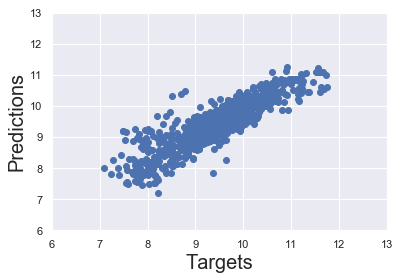

In [74]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets',size = 20)
plt.ylabel('Predictions',size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We see that for higher prices, we have higher concentrations about the 45degree line implying our model is very good at predicting higher prices...but for lower prices there is more scatter..

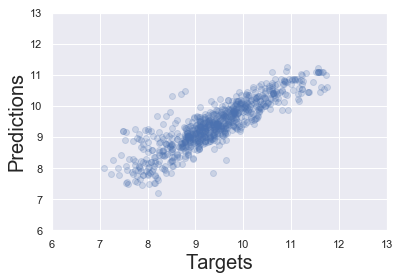

In [75]:
plt.scatter(y_test, y_hat_test,alpha = 0.2) #alpha specifies the opacity..takes values from 0-1 with 1 being default
plt.xlabel('Targets',size = 20)
plt.ylabel('Predictions',size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

More saturated the colour, the higher the concentration

In [76]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])  #pf = perfomance
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


Since we used log on exp of x to get these values, we can get back the original values if we take the exp of the log prices.

In [78]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [80]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


The above data has indices 0,1,2,etc named **Ia** that were generated on its own by DF

In [81]:
y_test.head()

1192    7.740664
3360    7.937375
2350    7.824046
3257    8.764053
892     9.121509
Name: log_price, dtype: float64

The original data had indices 0,1,2,etc named **Ib**...when the data was split into train and test, it still had these original indices(as seen above 1192,3360,etc)...So When we added y_test to df_pf (in line **In [80]**), pandas tried to match **Ia** with **Ib**, and thus we got **NaN** values..so we need to forget this original indexing

In [82]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [83]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [84]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [86]:
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference %
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [87]:
df_pf.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


We see minimum Difference% is 0.06 but max is very high

In [90]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Prediction,Target,Residual,Difference %
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


Revising the dataframe, we can see for which observations our predictions were very far off...going to the bottom of the dataset we can see some samples having very high difference%...the targets are extremely low and predictions are higher(like seen above)...we may have missed an important feature which drives the price of the used car lower..it may also be the model of the car that we removed at the beginning...or it may be a piece of info that we dint have like damages to the car, etc...

TO IMPROVE THE EXISTING MODEL:

1, Use different set of features
2, Remove bigger part of the outliers
3, Use different kinds of transformations

It may take months to improve a model...